In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import pickle

In [2]:
uc_df = pd.read_csv("./attributeData/userChoices.csv", header=None)
uc_df.columns = ['attribute', 'hit_id', 'user_id', 'font_a_name', 'font_b_name', 'user_choice']

In [3]:
uc_df

,attribute,hit_id,user_id,font_a_name,font_b_name,user_choice
0,modern,3,2,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
1,modern,3,3,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
2,modern,3,4,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
3,modern,3,5,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
4,modern,3,6,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
5,modern,3,7,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
6,modern,3,8,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
7,modern,3,9,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
8,modern,4,2,Asset,CantoraOne-Regular,less
9,modern,4,5,Asset,CantoraOne-Regular,less


In [4]:
unique_font_a_names = uc_df.font_a_name.unique()
unique_font_b_names = uc_df.font_b_name.unique()
unique_attributes = uc_df.attribute.unique()
unique_users = uc_df.user_id.unique()

number_of_unique_font_a = len(unique_font_a_names)
number_of_unique_font_b = len(unique_font_b_names)
number_of_unique_attributes = len(unique_attributes)
number_of_unique_users = len(unique_users)

print(number_of_unique_font_a)
print(number_of_unique_font_b)
print(number_of_unique_attributes)
print(number_of_unique_users)

np.array_equal(np.sort(unique_font_a_names), np.sort(unique_font_b_names))

print(uc_df.shape)

200
200
31
639
(198400, 6)


In [5]:
print(np.sort(unique_users))

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

In [6]:
def get_unique_dict(unique_values):
    dict_id_to_name = dict(enumerate(unique_values))
    dict_name_to_id = dict((y,x) for x, y in dict_id_to_name.iteritems())
    return dict_id_to_name, dict_name_to_id

In [7]:
font_id_to_name_dict, font_name_to_id_dict  = get_unique_dict(unique_font_a_names)
id_to_attribute_dict, attribute_to_id_dict = get_unique_dict(unique_attributes)

In [8]:
font_name_to_id_dict

{'ARSMaquetteWebOne': 123,
 'Acme-Regular': 40,
 'AdventPro-SemiBold': 19,
 'Aldrich': 103,
 'Alegreya-BoldItalic': 175,
 'AllertaStencil-Regular': 18,
 'Amethysta-Regular': 44,
 'Andada-Bold': 70,
 'Andada-Italic': 80,
 'AndadaSC-Bold': 108,
 'AnonymousPro': 153,
 'ArchivoNarrow-Regular': 137,
 'ArialRoundedMTBold': 91,
 'ArialUnicodeMS': 167,
 'Arimo-Bold': 94,
 'Arimo-BoldItalic': 105,
 'Arizonia-Regular': 38,
 'Arvo-Bold': 9,
 'Arvo-BoldItalic': 152,
 'Arvo-Italic': 5,
 'Asap-Regular': 133,
 'Asset': 1,
 'Astloch-Bold': 32,
 'AveriaLibre-LightItalic': 99,
 'AveriaSansLibre-Italic': 45,
 'AveriaSerifLibre-Italic': 180,
 'BadScript-Regular': 65,
 'Bello-Pro': 7,
 'BenchNine-Regular': 63,
 'Bentham-Regular': 126,
 'Bevan': 90,
 'BilboSwashCaps-Regular': 43,
 'BlackOpsOne-Regular': 102,
 'BowlbyOneSC-Regular': 82,
 'Brevia-Regular': 121,
 'BubblerOne': 95,
 'Buenard-Bold': 159,
 'Cabin-SemiBoldItalic': 28,
 'CabinCondensed': 72,
 'CabinCondensed-Medium': 47,
 'Calluna-Regular': 53,
 'C

In [9]:
font_id_to_name_dict

{0: 'GentiumBasic-BoldItalic',
 1: 'Asset',
 2: 'ShareTech-Regular',
 3: 'Iceland-Regular',
 4: 'Oswald-Bold',
 5: 'Arvo-Italic',
 6: 'Roboto-MediumItalic',
 7: 'Bello-Pro',
 8: 'Syncopate-Bold',
 9: 'Arvo-Bold',
 10: 'ModernAntiqua-Regular',
 11: 'Marvel-Bold',
 12: 'PressStart2P-Regular',
 13: 'Oldenburg-Regular',
 14: 'Sevillana-Regular',
 15: 'Roboto-Black',
 16: 'Palatino-Roman',
 17: 'SourceCodePro-Black',
 18: 'AllertaStencil-Regular',
 19: 'AdventPro-SemiBold',
 20: 'FanwoodText-Italic',
 21: 'Megrim',
 22: 'LobsterTwo-Italic',
 23: 'NovaRound',
 24: 'Strait-Regular',
 25: 'Fenix',
 26: 'Slackey',
 27: 'Simonetta-Black',
 28: 'Cabin-SemiBoldItalic',
 29: 'UbuntuMono-Bold',
 30: 'GEInspira',
 31: 'OFLGoudyStMTT',
 32: 'Astloch-Bold',
 33: 'OriginalSurfer-Regular',
 34: 'GFSNeohellenic-Italic',
 35: 'FredokaOne-Regular',
 36: 'HoeflerText-Regular',
 37: 'Signika-Semibold',
 38: 'Arizonia-Regular',
 39: 'Futura-Medium',
 40: 'Acme-Regular',
 41: 'Philosopher',
 42: 'Tinos',
 43: '

In [10]:
id_to_attribute_dict

{0: 'modern',
 1: 'playful',
 2: 'clumsy',
 3: 'sharp',
 4: 'graceful',
 5: 'angular',
 6: 'strong',
 7: 'attention-grabbing',
 8: 'artistic',
 9: 'attractive',
 10: 'complex',
 11: 'calm',
 12: 'friendly',
 13: 'happy',
 14: 'legible',
 15: 'sloppy',
 16: 'warm',
 17: 'delicate',
 18: 'charming',
 19: 'formal',
 20: 'wide',
 21: 'disorderly',
 22: 'gentle',
 23: 'technical',
 24: 'boring',
 25: 'pretentious',
 26: 'bad',
 27: 'dramatic',
 28: 'thin',
 29: 'fresh',
 30: 'soft'}

In [11]:
attribute_to_id_dict

{'angular': 5,
 'artistic': 8,
 'attention-grabbing': 7,
 'attractive': 9,
 'bad': 26,
 'boring': 24,
 'calm': 11,
 'charming': 18,
 'clumsy': 2,
 'complex': 10,
 'delicate': 17,
 'disorderly': 21,
 'dramatic': 27,
 'formal': 19,
 'fresh': 29,
 'friendly': 12,
 'gentle': 22,
 'graceful': 4,
 'happy': 13,
 'legible': 14,
 'modern': 0,
 'playful': 1,
 'pretentious': 25,
 'sharp': 3,
 'sloppy': 15,
 'soft': 30,
 'strong': 6,
 'technical': 23,
 'thin': 28,
 'warm': 16,
 'wide': 20}

In [12]:
df2 = uc_df.replace({'font_a_name' : font_name_to_id_dict})
df2 = df2.replace({'font_b_name' : font_name_to_id_dict})
df2 = df2.replace({'attribute' : attribute_to_id_dict})

In [13]:
df2

,attribute,hit_id,user_id,font_a_name,font_b_name,user_choice
0,0,3,2,0,18,more
1,0,3,3,0,18,more
2,0,3,4,0,18,more
3,0,3,5,0,18,less
4,0,3,6,0,18,less
5,0,3,7,0,18,less
6,0,3,8,0,18,more
7,0,3,9,0,18,less
8,0,4,2,1,114,less
9,0,4,5,1,114,less


In [14]:
def get_weight_array(attribute_id):
    df3 = df2.loc[df2['attribute'] == attribute_id]
    number_of_samples = df3.shape[0]
    print(number_of_samples," rows with attribute", id_to_attribute_dict[attribute_id])
    samples = np.zeros((number_of_unique_font_a, number_of_samples))

    i = 0
    for _, row in df3.iterrows():
        font_a_index = row['font_a_name']
        font_b_index = row['font_b_name']

        samples[font_a_index, i] = 1
        samples[font_b_index, i] = -1
        
        i += 1

    y = df3['user_choice'] == 'more'
    return samples, y

In [15]:
def get_user_array(attribute_id):
    df3 = df2.loc[df2['attribute'] == attribute_id]
    number_of_samples = df3.shape[0]
    samples = np.zeros((number_of_unique_users, number_of_samples))

    i = 0
    for _, row in df3.iterrows():
        user_index = row['user_id'] - 2
        samples[user_index, i] = 1
        
        i += 1

    return samples

In [16]:
def change_range(range1, min_dest, max_dest):
    min_r = range1.min()
    max_r = range1.max()
    
    return [float(max_dest - min_dest) / float(max_r - min_r) * (e - min_r) + min_dest for e in range1]

In [17]:
def get_final_pair(w1):
    retVal = {}
    for item in range(len(w1)):
        retVal[font_id_to_name_dict[item]] = w1[item]
    return retVal

In [18]:
def estimate_attribute(attribute_id):
    wa, opinions = get_weight_array(attribute_id)
    Y = np.asarray([int(e) for e in opinions])
    
    U = get_user_array(attribute_id)

    w = np.ones(number_of_unique_font_a)
    u = np.ones(number_of_unique_users)

    logreg1 = linear_model.LogisticRegression(C=1e5)
    logreg2 = linear_model.LogisticRegression(C=1e5)

    t2 = u.dot(U)
    X = np.multiply(t2, wa).T
    
    logreg1.fit(X, Y)
    w = logreg1.coef_

    t1 = w.dot(X.T)
    U = np.multiply(t1, U).T
    logreg2.fit(U, Y)
    u = logreg2.coef_

    u_transformed = change_range(u.flatten(), -1.0, 1.0)
    w_transformed = change_range(w.flatten(), 0, 100)
    
    pairs = get_final_pair(w_transformed)
    return pairs, w_transformed, u_transformed, w, u

In [19]:
p, ws, us, w, u = estimate_attribute(0)
sorted_pairs = sorted(p, key=lambda x: x[0])
# print(sorted_pairs)

(6400, ' rows with attribute', 'modern')


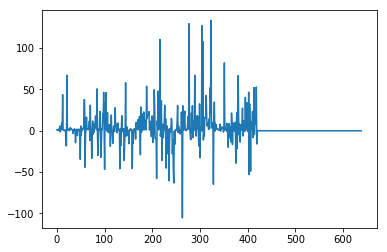

In [20]:
plt.plot(u.flatten())
plt.show()

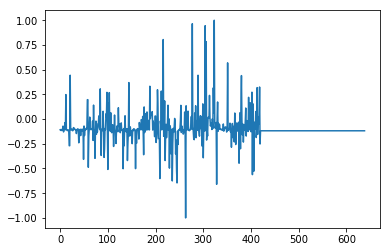

In [21]:
u_transformed = change_range(u.flatten(), -1.0, 1.0)
plt.plot(u_transformed)
plt.show()

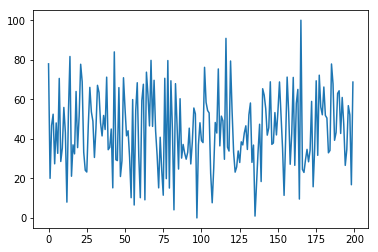

In [22]:
w_transformed = change_range(w.flatten(), 0, 100)
plt.plot(w_transformed)
plt.show()

In [23]:
print(w_transformed[:20])

[77.93406463791024, 20.024123828040167, 46.802560447372834, 52.460388526483712, 27.372847984346222, 48.043794100864197, 32.668476411192884, 70.571031514788871, 28.555037359220151, 35.297791943615238, 55.885287947327768, 43.190627148047525, 7.9847743509946687, 53.257813842148117, 81.660879159901938, 21.086421212625531, 36.960686292631074, 32.408518782336088, 63.97219869845771, 35.570837911573342]


In [24]:
%%time

output_df = DataFrame()
for attribute_index in range(number_of_unique_attributes):
    p, ws, us, w, u = estimate_attribute(attribute_index)
    output_df[id_to_attribute_dict[attribute_index]] = Series(p)
    sorted_pairs = sorted(p, key=lambda x: x[0])
    # print(sorted_pairs)

(6400, ' rows with attribute', 'modern')
(6400, ' rows with attribute', 'playful')
(6400, ' rows with attribute', 'clumsy')
(6400, ' rows with attribute', 'sharp')
(6400, ' rows with attribute', 'graceful')
(6400, ' rows with attribute', 'angular')
(6400, ' rows with attribute', 'strong')
(6400, ' rows with attribute', 'attention-grabbing')
(6400, ' rows with attribute', 'artistic')
(6400, ' rows with attribute', 'attractive')
(6400, ' rows with attribute', 'complex')
(6400, ' rows with attribute', 'calm')
(6400, ' rows with attribute', 'friendly')
(6400, ' rows with attribute', 'happy')
(6400, ' rows with attribute', 'legible')
(6400, ' rows with attribute', 'sloppy')
(6400, ' rows with attribute', 'warm')
(6400, ' rows with attribute', 'delicate')
(6400, ' rows with attribute', 'charming')
(6400, ' rows with attribute', 'formal')
(6400, ' rows with attribute', 'wide')
(6400, ' rows with attribute', 'disorderly')
(6400, ' rows with attribute', 'gentle')
(6400, ' rows with attribute', 

In [25]:
output_df.head()
output_df.to_csv('output.csv', sep=',')